# multidimensional cumulative sums and faceting with seaborn

## 1. import libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

## 2. load input table

In [2]:
input_path = 'tbl_n.process.htbin.metbin.minChi.txt'
tbl = pd.read_table(input_path, delim_whitespace=True)

In [3]:
tbl.head()

,process,htbin,metbin,minChi,n,nvar,luminosity
0,QCD,0,0,0.00,9632.431,30.22851,0.01
1,QCD,0,0,0.05,8523.772,26.71834,0.01
2,QCD,0,0,0.10,7126.319,22.18781,0.01
3,QCD,0,0,0.15,5813.719,17.93306,0.01
4,QCD,0,0,0.20,4712.205,14.38443,0.01


## 3. calculate cumulative sum in multipe dimensions

### 3.1 fill missing categories

In [4]:
tbl.groupby('process').size()

process
QCD            873
TTJets         966
WJetsToLNu     937
ZJetsToNuNu    941
dtype: int64

In [5]:
keys = ['process', 'htbin', 'metbin', 'minChi']
tbl_mesh = pd.DataFrame(list(itertools.product(*[np.sort(tbl[c].unique()) for c in keys])))
tbl_mesh.columns = keys
tbl = pd.merge(tbl_mesh, tbl, how='left')
tbl.fillna(0, inplace=True)
tbl.groupby('process').size()

process
QCD            990
TTJets         990
WJetsToLNu     990
ZJetsToNuNu    990
dtype: int64

### 3.2 calculate cumulative sum

In [6]:
tbl['cumn'] = tbl['n']
tbl['cumn'] = tbl[::-1].groupby(['process', 'htbin', 'metbin'])['cumn'].cumsum()[::-1]
tbl['cumn'] = tbl[::-1].groupby(['process', 'htbin', 'minChi'])['cumn'].cumsum()[::-1]
tbl['cumn'] = tbl[::-1].groupby(['process', 'metbin', 'minChi'])['cumn'].cumsum()[::-1]

### 3.3 stack processes (cumulative sum in non-numeric dimension)

In [7]:
tbl['cumn'] = tbl[::-1].groupby(['htbin', 'metbin', 'minChi'])['cumn'].cumsum()[::-1]

## 4 draw with faceting with seaborn

In [9]:
with np.errstate(divide='ignore'):
    tbl['log10cumn'] = np.log10(tbl['cumn'])

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


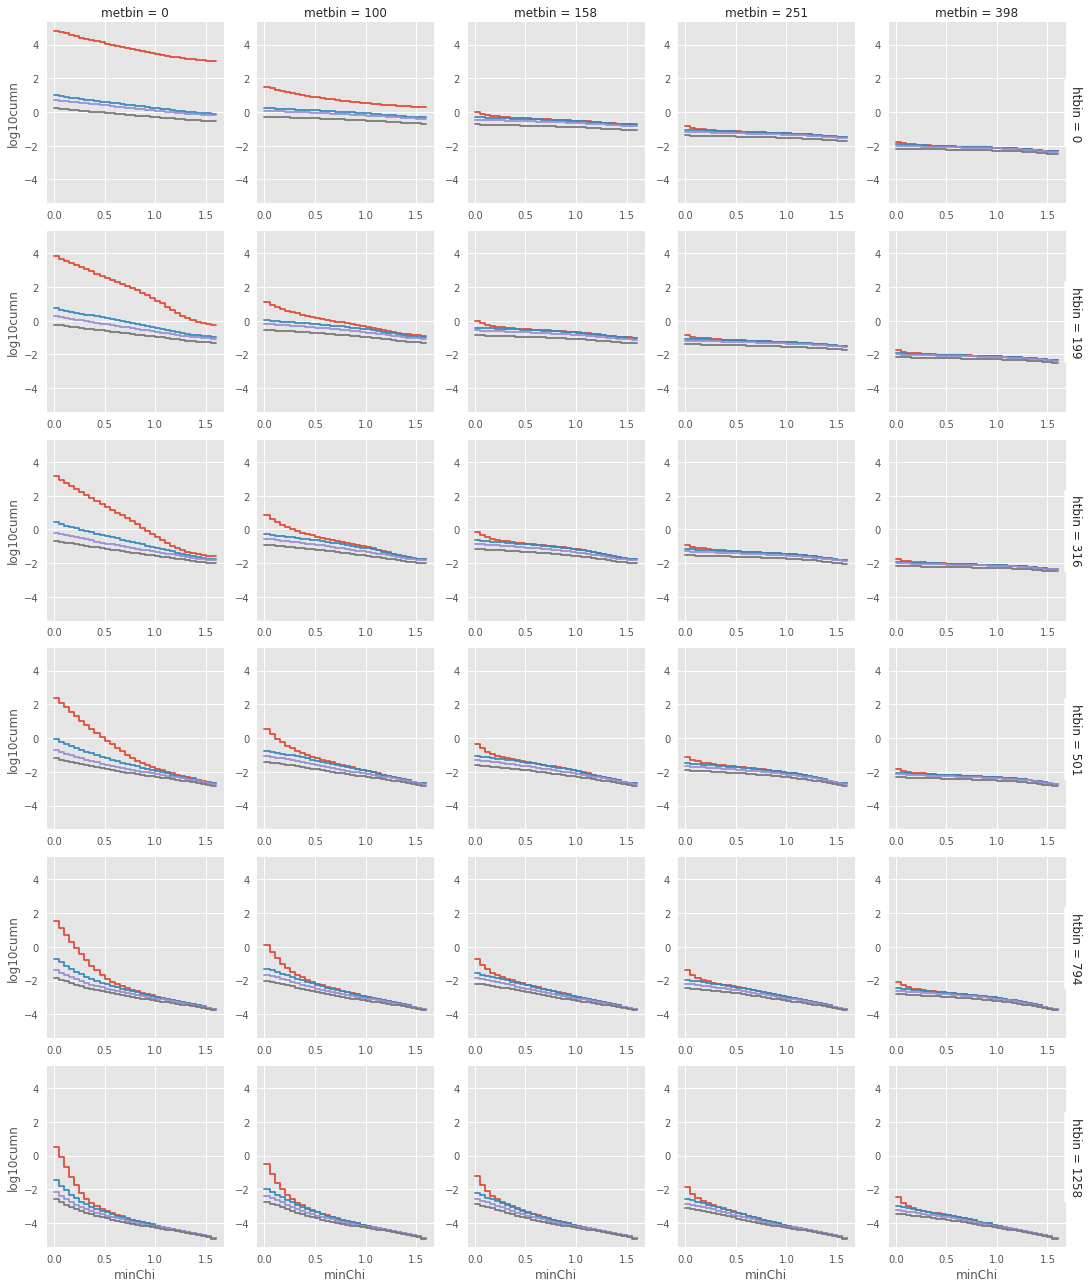

In [10]:
g = sns.FacetGrid(tbl, row="htbin", col="metbin", hue='process', margin_titles=True)
g.map(plt.step, 'minChi', 'log10cumn', where='post')